In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2538 - accuracy: 0.8973 - val_loss: 0.2646 - val_accuracy: 0.8813
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2526 - accuracy: 0.8982 - val_loss: 0.2632 - val_accuracy: 0.8904
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.8982 - val_loss: 0.2641 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.8953 - val_loss: 0.2629 - val_accuracy: 0.8904
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.8963 - val_loss: 0.2625 - val_accuracy: 0.8904
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2537 - accuracy: 0.8973 - val_loss: 0.2624 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2546 - accuracy: 0.8982 - val_loss: 0.2627 - val_accuracy: 0.8904
Epoch 8/100
3

Epoch 59/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.8963 - val_loss: 0.2551 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.8982 - val_loss: 0.2569 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.8963 - val_loss: 0.2548 - val_accuracy: 0.8904
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.8992 - val_loss: 0.2542 - val_accuracy: 0.8904
Epoch 63/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.8973 - val_loss: 0.2551 - val_accuracy: 0.8904
Epoch 64/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.8992 - val_loss: 0.2545 - val_accuracy: 0.8904
Epoch 65/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.8973 - val_loss: 0.2547 - val_accuracy: 0.8904
Epoch 

In [32]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 831us/step - loss: 0.2397 - accuracy: 0.9041


0.9041095972061157

In [33]:
import matplotlib.pyplot as plt

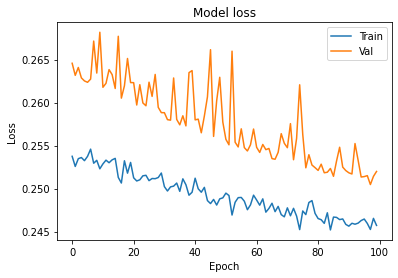

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

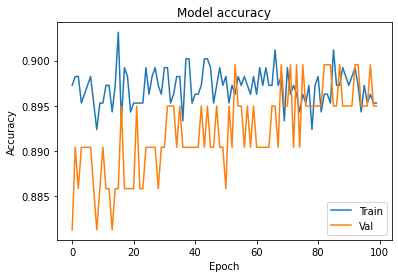

In [44]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 22ms/step - loss: 0.5046 - accuracy: 0.7544 - val_loss: 0.3802 - val_accuracy: 0.8174
Epoch 2/100
32/32 [==============================] - 1s 17ms/step - loss: 0.3449 - accuracy: 0.8620 - val_loss: 0.3463 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3620 - accuracy: 0.8532 - val_loss: 0.4086 - val_accuracy: 0.8128
Epoch 4/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3171 - accuracy: 0.8669 - val_loss: 0.2997 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.3173 - accuracy: 0.8708 - val_loss: 0.3431 - val_accuracy: 0.8539
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2927 - accuracy: 0.8826 - val_loss: 0.2907 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 0s 15ms/step - loss: 0.2711 - accuracy: 0.8894 - val_loss: 0.3119 - val_accuracy: 0.8721
Epoch 

32/32 [==============================] - 1s 16ms/step - loss: 0.1631 - accuracy: 0.9276 - val_loss: 0.3514 - val_accuracy: 0.8584
Epoch 59/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1786 - accuracy: 0.9325 - val_loss: 0.3211 - val_accuracy: 0.8721
Epoch 60/100
32/32 [==============================] - 1s 16ms/step - loss: 0.1736 - accuracy: 0.9286 - val_loss: 0.4021 - val_accuracy: 0.8767
Epoch 61/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1979 - accuracy: 0.9227 - val_loss: 0.2933 - val_accuracy: 0.8858
Epoch 62/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1534 - accuracy: 0.9432 - val_loss: 0.3976 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1419 - accuracy: 0.9491 - val_loss: 0.4051 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 0s 15ms/step - loss: 0.1669 - accuracy: 0.9247 - val_loss: 0.3199 - val_accuracy: 0.8904
Epoch 65/100

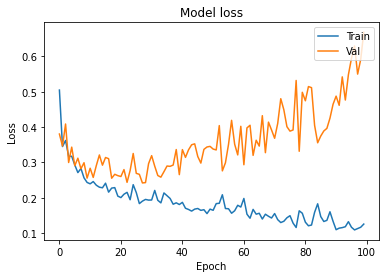

In [37]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

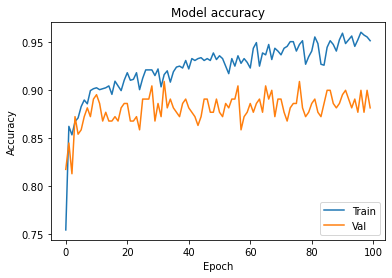

In [45]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [39]:
from keras.layers import Dropout
from keras import regularizers

In [40]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [41]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 39ms/step - loss: 14.2657 - accuracy: 0.6047 - val_loss: 3.9446 - val_accuracy: 0.8082
Epoch 2/100
32/32 [==============================] - 1s 28ms/step - loss: 1.6885 - accuracy: 0.8160 - val_loss: 0.6536 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 1s 30ms/step - loss: 0.5492 - accuracy: 0.8669 - val_loss: 0.5194 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5556 - accuracy: 0.8376 - val_loss: 0.5134 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.5246 - accuracy: 0.8493 - val_loss: 0.5600 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 1s 28ms/step - loss: 0.5005 - accuracy: 0.8679 - val_loss: 0.4859 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4799 - accuracy: 0.8679 - val_loss: 0.4645 - val_accuracy: 0.8676
Epoch

32/32 [==============================] - 1s 31ms/step - loss: 0.4351 - accuracy: 0.8767 - val_loss: 0.4258 - val_accuracy: 0.8904
Epoch 59/100
32/32 [==============================] - 1s 32ms/step - loss: 0.4273 - accuracy: 0.8865 - val_loss: 0.4250 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4352 - accuracy: 0.8855 - val_loss: 0.4695 - val_accuracy: 0.8402
Epoch 61/100
32/32 [==============================] - 1s 29ms/step - loss: 0.4435 - accuracy: 0.8885 - val_loss: 0.4566 - val_accuracy: 0.8493
Epoch 62/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4414 - accuracy: 0.8806 - val_loss: 0.4397 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 1s 28ms/step - loss: 0.4440 - accuracy: 0.8885 - val_loss: 0.4378 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 1s 33ms/step - loss: 0.4377 - accuracy: 0.8875 - val_loss: 0.4286 - val_accuracy: 0.8904
Epoch 65/100

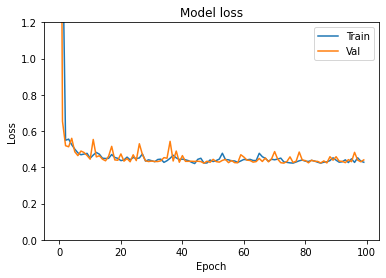

In [42]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

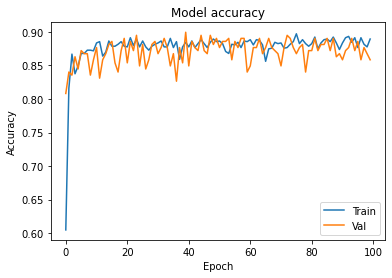

In [46]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()